In [3]:
import numpy as np
from sklearn import svm
import pandas as pd
import cv2
import sklearn
import matplotlib.pyplot as plt

In [2]:
#build df

y_true = np.ones(91)

for i in range(7, 76):
    y_true[i] = 0
    
y_true = np.resize(y_true, (y_true.shape[0],1))



img = cv2.imread(str(2) + '\\530_0.JPG')
img_flat = img[:, :, 0].flatten()
img_flat = np.resize(img_flat, (1, img_flat.shape[0]))
df = pd.DataFrame(img_flat)


for i in range(3, 93):
    img = cv2.imread(str(i) + '\\530_0.JPG')
    img_flat = img[:, :, 0].flatten()
    img_flat = np.resize(img_flat, (1, img_flat.shape[0]))
    df_curr = pd.DataFrame(img_flat)
    df= df.append(df_curr)
    
df['target'] = y_true

In [5]:
df = sklearn.utils.shuffle(df)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,8294391,8294392,8294393,8294394,8294395,8294396,8294397,8294398,8294399,target
0,0,0,0,2,3,0,0,0,0,0,...,12,10,10,10,10,7,6,2,1,0.0
0,0,0,0,1,0,0,0,0,0,0,...,7,0,0,3,3,7,10,17,21,1.0
0,4,4,3,0,0,0,0,0,0,0,...,7,11,12,18,19,20,19,17,16,0.0
0,0,0,1,7,12,16,14,13,16,16,...,13,10,9,10,8,9,5,5,3,1.0
0,0,0,2,3,6,3,0,0,1,1,...,8,12,7,3,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,1,4,4,7,11,11,13,12,...,32,27,27,26,25,24,23,23,23,1.0
0,12,11,9,7,4,4,4,4,0,0,...,0,2,2,3,9,15,20,24,24,0.0
0,16,14,11,10,8,8,7,6,0,0,...,23,23,19,18,14,15,12,11,7,0.0
0,0,0,0,0,1,0,0,0,2,3,...,26,20,16,13,11,10,7,3,0,0.0


In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:8294399]  
y = df.iloc[:,-1] # target

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score']  
featureScores.nlargest(15,'Score')

,feature,Score
15469,15469,1396.106298
61543,61543,1349.656525
11629,11629,1346.165185
53863,53863,1340.661076
15470,15470,1331.352637
7789,7789,1328.258365
19310,19310,1316.282745
19309,19309,1307.433849
115306,115306,1304.178941
119146,119146,1303.115574


In [8]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print("x_train:", X_train.shape, "x_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (63, 8294400) x_test: (28, 8294400) y_train: (63,) y_test: (28,)


In [ ]:
clf = svm.SVC()
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

## merge images

In [25]:
def plot_img_layers(img_path):
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.show()
    plt.imshow(img[:,:,0])
    plt.show()
    plt.imshow(img[:,:,1])
    plt.show()
    plt.imshow(img[:,:,2])
    plt.show()

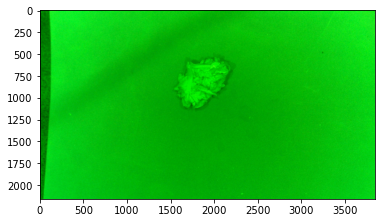

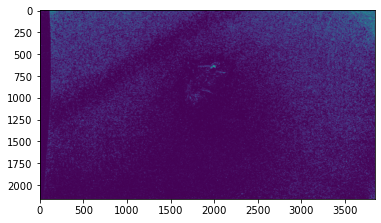

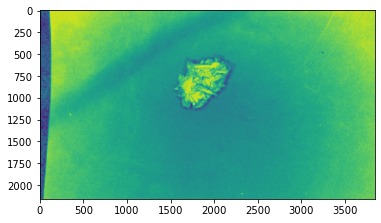

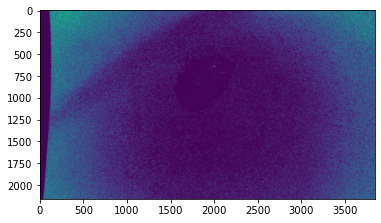

In [47]:
plot_img_layers(str(78) + '\\530_0.JPG')

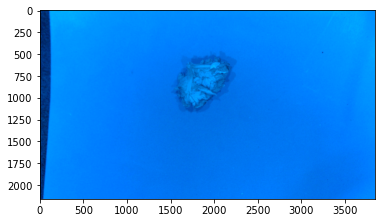

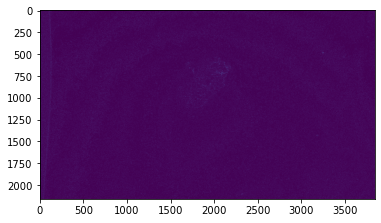

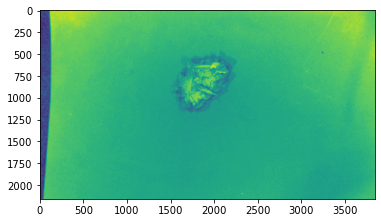

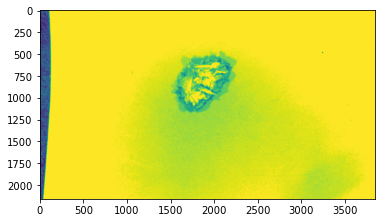

In [48]:
plot_img_layers(str(78) + '\\590_0.JPG')

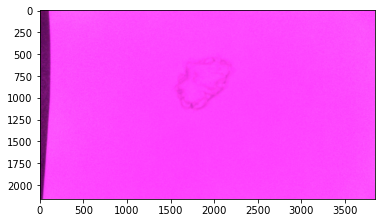

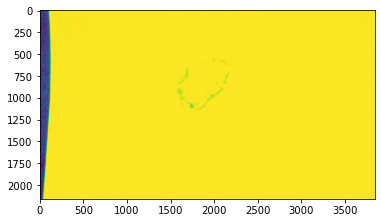

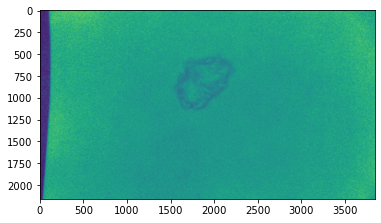

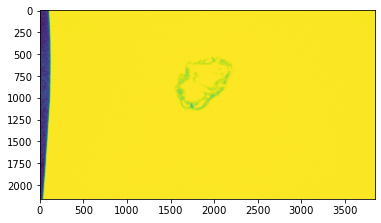

In [49]:
plot_img_layers(str(78) + '\\940_0.JPG')

In [50]:
img_940 = cv2.imread(str(78) + '\\940_0.JPG')
img_530 = cv2.imread(str(78) + '\\530_0.JPG')
img_590 = cv2.imread(str(78) + '\\590_0.JPG')
img_merge = np.dstack((img_530[:,:,1], img_940[:,:,1], img_590[:,:,0]))
img_merge.shape

(2160, 3840, 3)

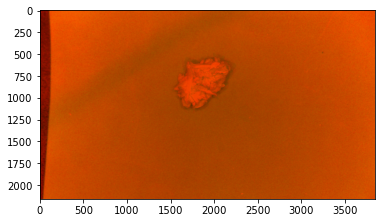

In [51]:
plt.imshow(img_merge)
plt.show()

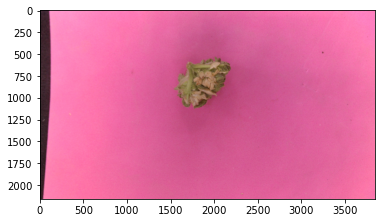

In [4]:
img_rgb = cv2.imread(str(78) + '\\rgb_0.JPG', cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb[:,:,::-1])
plt.show()